#  Decision tree for classification

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

### 1) Reading of the processed dataset

In [17]:
X_train = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/ML-Decision-Tree-PilarZarco/data/raw/diabete.csv")

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106.0,56.0,27.00000,165.000000,29.000000,0.426,22
1,1,89.0,66.0,23.00000,94.000000,28.100000,0.167,21
2,1,116.0,78.0,29.00000,180.000000,36.100000,0.496,25
3,6,115.0,60.0,39.00000,155.548223,33.700000,0.245,40
4,5,136.0,82.0,29.15342,155.548223,32.457464,0.640,69


In [18]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


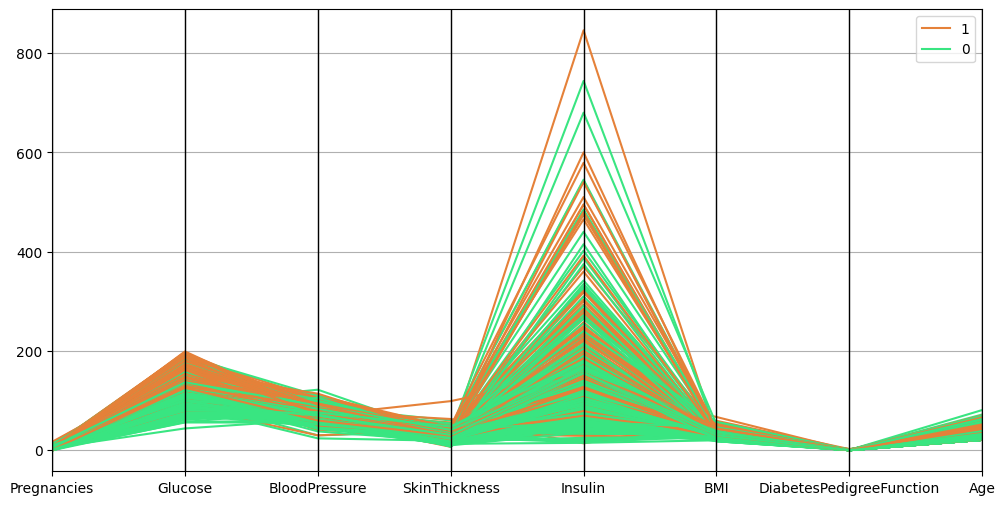

In [19]:
# Relationship of the variables with the target
df.drop("Unnamed: 0", axis=1, inplace=True)

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

### 2) Model initialisation and training

In [20]:
# Create and train the decision tree model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 71)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=71)

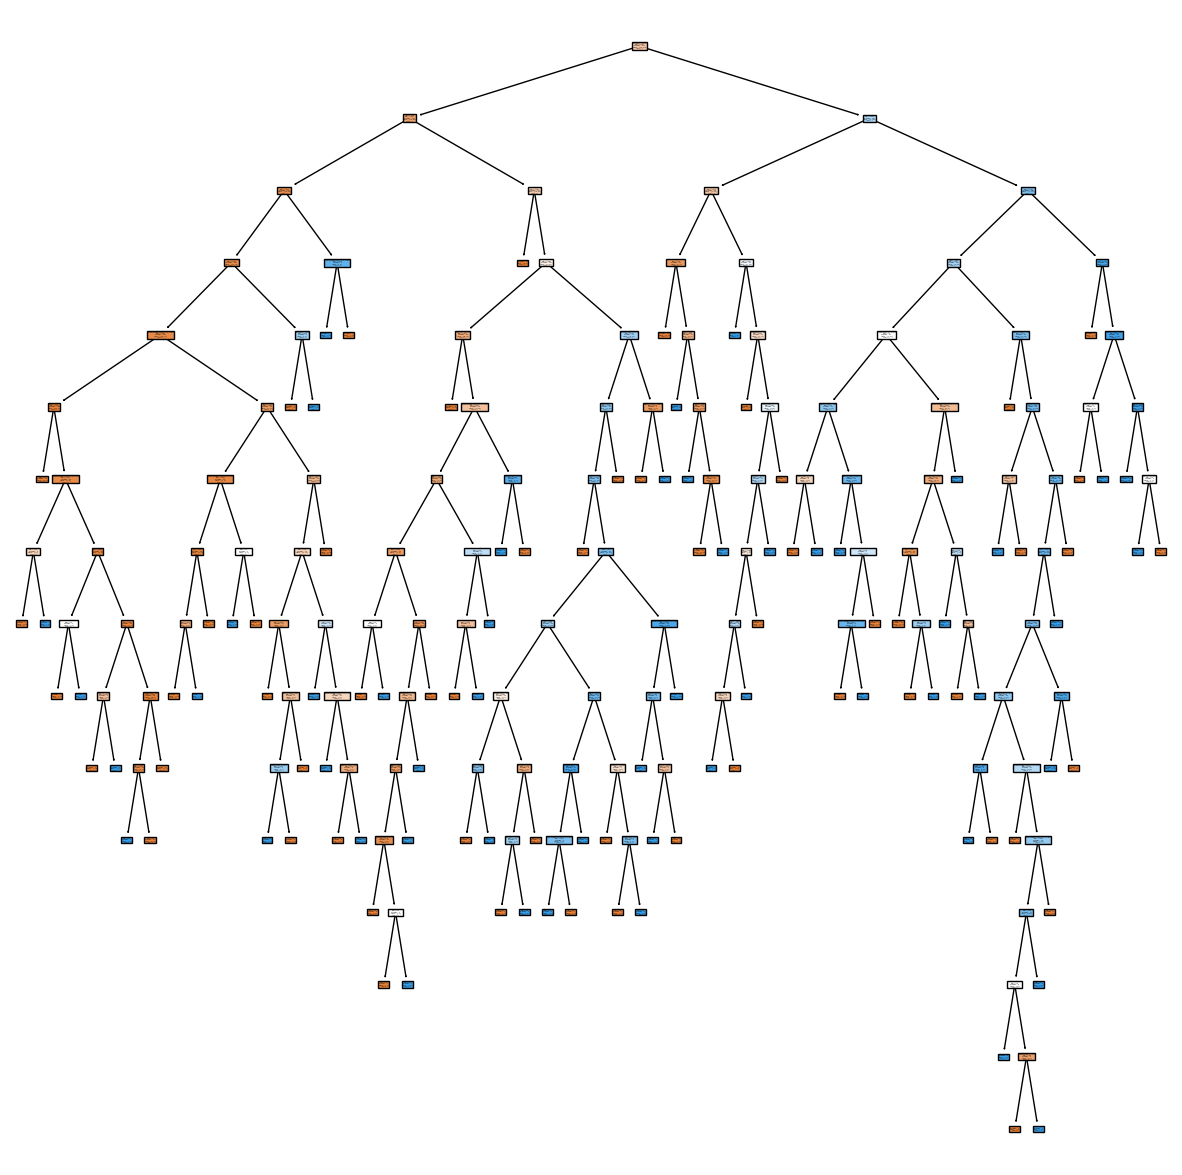

In [21]:
# Visualise the decision tree
from sklearn import tree

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### 3) Model prediction

In [22]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [23]:
# model accuracy in the test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7077922077922078

### 4) Model optimization

In [24]:
# Find the best combination of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=71),
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

best_hyperparams = grid.best_params_

print(f"Best hyperparameters: {best_hyperparams}")

Best hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [26]:
model = DecisionTreeClassifier(**best_hyperparams, random_state = 71)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=0.5,
                       min_samples_split=20, random_state=71)

In [27]:
# # Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [28]:
# Evaluate accuracy in the test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7207792207792207

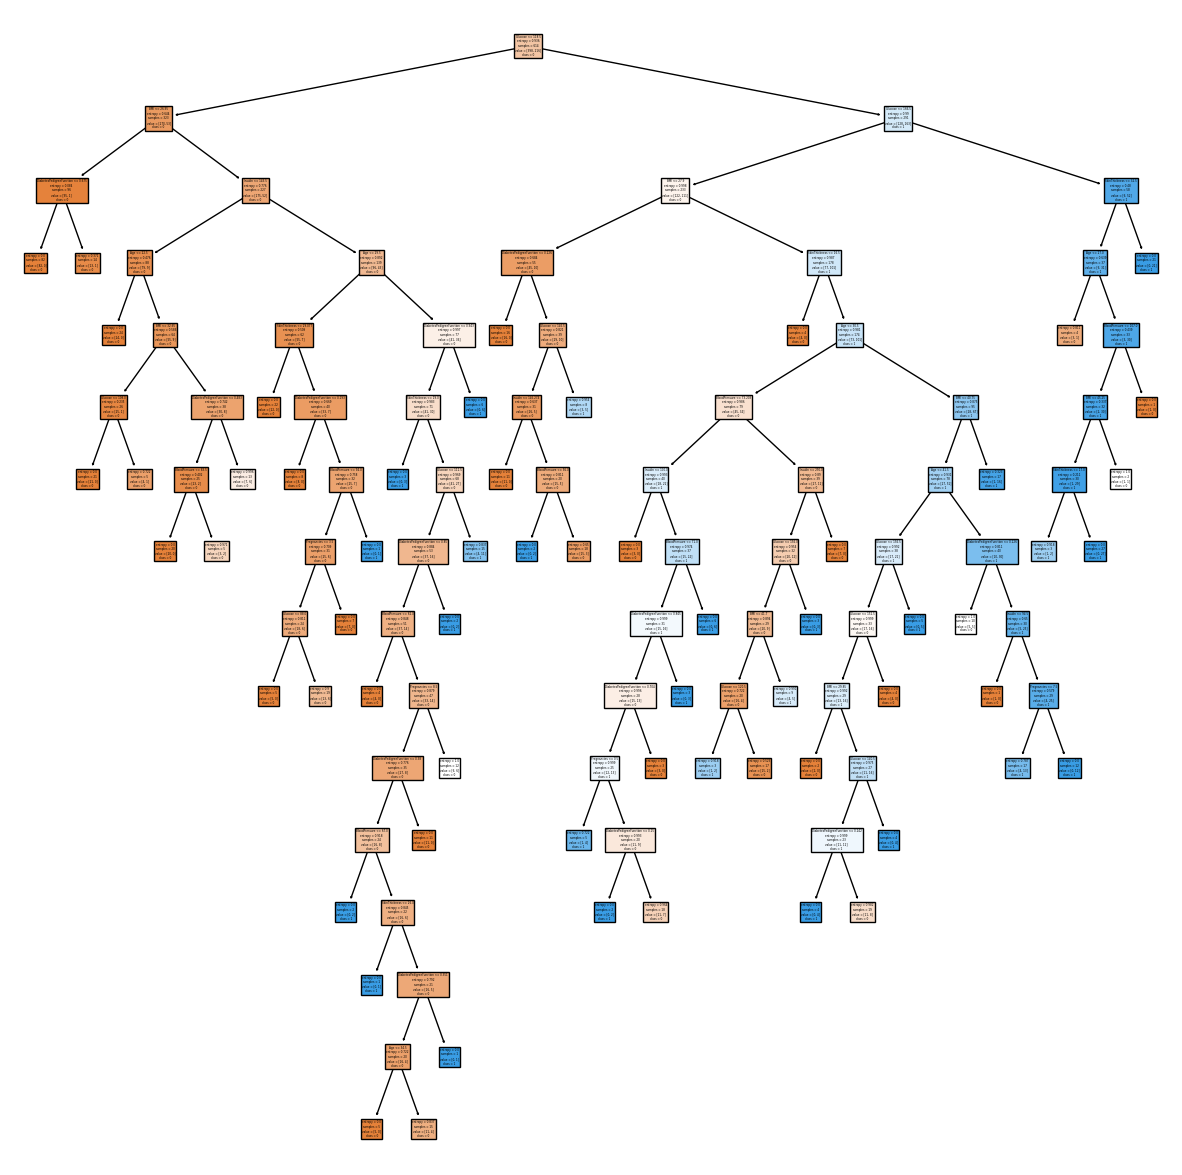

In [29]:
# Visualise the decision tree optimized
fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [30]:
# save trained model
from pickle import dump

dump(model, open("/workspaces/ML-Decision-Tree-PilarZarco/models/decision_tree_classifier_default_71.sav", "wb"))